In [20]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy.spatial
import scipy
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [102]:
#this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0]))
    leafsize = 2048
    # build kdtree
    ###########
#     print(pts)
    tree = spatial.KDTree(pts, leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print('done.')
    return density

In [75]:
#set the root to the Shanghai dataset you download
root = '../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/'

In [76]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [77]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [103]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_85.jpg
(267, 496)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_246.jpg
(267, 400)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_157.jpg
(450, 299)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_28.jpg
(375, 500)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_175.jpg
(360, 640)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_79.jpg
(820, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_126.jpg
(576, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IM

generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_106.jpg
(675, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_248.jpg
(681, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_161.jpg
(480, 640)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_287.jpg
(716, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_76.jpg
(563, 832)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_199.jpg
(505, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_226.jpg
(615, 922)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/par

generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_279.jpg
(294, 488)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_81.jpg
(282, 377)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_137.jpg
(585, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_86.jpg
(387, 580)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_182.jpg
(680, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_192.jpg
(640, 480)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_72.jpg
(663, 962)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_

generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_270.jpg
(300, 416)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_295.jpg
(684, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_138.jpg
(652, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_43.jpg
(683, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_171.jpg
(351, 600)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_238.jpg
(469, 709)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_275.jpg
(270, 360)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part

generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_94.jpg
(370, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_266.jpg
(391, 630)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_231.jpg
(682, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_19.jpg
(600, 900)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_128.jpg
(683, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_282.jpg
(768, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_109.jpg
(681, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/par

done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_158.jpg
(428, 594)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_166.jpg
(540, 960)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_68.jpg
(607, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_34.jpg
(200, 300)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_61.jpg
(398, 598)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_170.jpg
(687, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_37.jpg
(669, 1000)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_

done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_103.jpg
(666, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_58.jpg
(706, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_172.jpg
(350, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_113.jpg
(506, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_81.jpg
(343, 743)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_137.jpg
(299, 449)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_86.jpg
(741, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/I

done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_22.jpg
(540, 720)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_145.jpg
(367, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_143.jpg
(432, 550)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_59.jpg
(350, 860)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_27.jpg
(781, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_93.jpg
(299, 450)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_111.jpg
(683, 1024)
generate density...
done.
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_

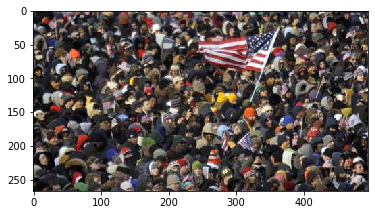

In [104]:
#now see a sample from ShanghaiA
plt.imshow(Image.open(img_paths[0]))

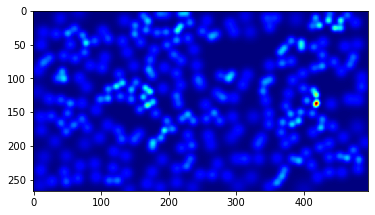

In [105]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [106]:
np.sum(groundtruth)# don't mind this slight variation

267.51086

In [107]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train,part_B_test]

In [108]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [110]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,15)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_386.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_85.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_246.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_157.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_28.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_175.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_79.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_391.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_126.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_69.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/

../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_385.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_356.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_347.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_31.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_313.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_368.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_25.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_323.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_38.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_5.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/t

../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_195.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_14.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_351.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_387.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_49.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_20.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_46.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_23.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_373.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_66.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/tr

../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_7.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_163.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_151.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_249.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_129.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_384.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_308.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_208.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_191.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_201.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_fina

../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_261.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_318.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_341.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_77.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_17.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_377.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_353.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_96.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_280.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_11.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/

../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_146.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_193.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_84.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_272.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_213.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_289.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_122.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_222.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_39.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_196.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_dat

../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_198.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_58.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_172.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_113.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_279.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_81.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_137.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_86.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_182.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_192.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data

../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_191.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_201.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_100.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_258.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_298.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_200.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_21.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_207.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_80.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_32.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data

../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_242.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_162.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_281.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_121.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_75.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_112.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_305.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_154.jpg
../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_29.jpg
